# Data analysis of NFsim output
<br>
Author: Aniruddha Chattaraj

NFsim is an open source stochastic simulator for rule based modeling of biochemical systems http://michaelsneddon.net/nfsim/.
It is integrated within Virtual Cell (https://vcell.org/) framework which enables the users to build complex models using a graphical interface and run simulations using different kinds of solvers apart from NFsim. <br>

This tutorial assumes that we already have some simulated data and we want to analyze the results. <br>

We specify the model using the graphical interface of Virtual Cell in bngl (BioNetGen Language) format and run multiple trials of a given simulation condition using the high performance facility at UConn Health https://health.uconn.edu/high-performance-computing/. Next, to analyze the results, we execute the following python routines. All the packages are managed by Anaconda distributor. 

### Import packages and specify the simulation path

- Import the relevant packages first. Currently we have to place the files in the same directory as the notebook. It will be bundled together in near future to automate the depenedency management.
- Specify the full path of the simulation results. For example, let's say, we run 100 stochastic trials of "myModel_conc_30uM.bngl" and the directory "myModel_conc_30uM" contains all those results. In this case, absolute path of "myModel_conc_30uM" needs to be specified.  
<br> 

Note: NFsim simulation with "cb" flag does not allow intra-cluster binding (ICB), where "cb" stands for complex-bookkeeping. 
<br>

In [9]:
# import packages
from NFsimAnalyzer import NFSim_output_analyzer 
from bound_fraction_nfsim import BoundFraction_NFsim
from plotNFsim_data import *

# specify the path
path = './test_dataset/FTC_A5_B5_90uM_wo_cb'

# Name of the molecules present in the system
molecules = ['poly_A', 'poly_B']

# valency (number of binding sites)
valency = [5, 5]

### Collect statistics across multiple stochastic runs
- Compute the free molecular concentrations
- Collect the clusters and compute the distribution


***** // ***** 
Class : NFSim_output_analyzer
System : FTC_A5_B5_90uM_wo_cb
Total Trajectories : 100

Processing gdat_files : [****************************************] 100%
Processing species_files : [****************************************] 100%


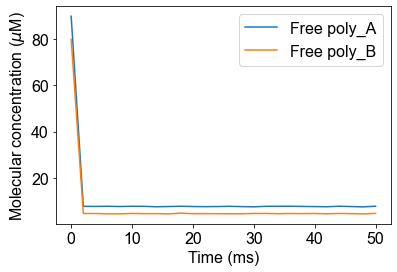

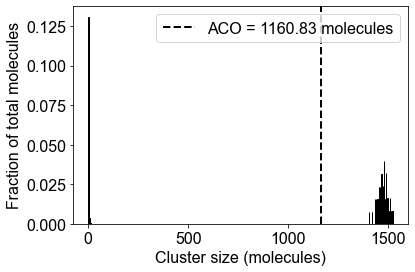

In [10]:
# process gdat and species files 
nfs_obj = NFSim_output_analyzer(path)
print(nfs_obj)
nfs_obj.process_gdatfiles(m2cf_div=10,saveDist=False,printProgress=True)
nfs_obj.process_speciesfiles(molecules,calcRatio=False,printProgress=True)

plotFreeConc(path)
plotClusterDistribution(path)

Class : BoundFraction_NFsim
System : FTC_A5_B5_90uM_wo_cb

Processing 100 species files ...

Progress : [****************************************] 100%


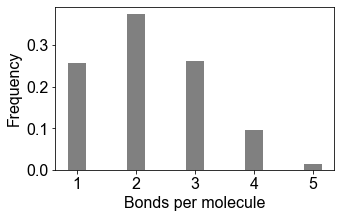

In [11]:
# process species files to extract binding saturations of individual clusters
bf_nfs = BoundFraction_NFsim(path, binding_sites=valency, molecules=molecules)
print(bf_nfs) 
print()
bf_nfs.get_boundFraction(saveIt=True)